In [421]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [422]:
#the names of the 8 countries with highest corona patients in the fourth month of 2020

data= pd.read_csv('COVID-19-time-series-clean-complete.csv')
data.head()

,Unnamed: 0,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
0,0,2020-01-22,Afghanistan,0,0,0.0,0.0,0,0,0
1,1,2020-01-22,Albania,0,0,0.0,0.0,0,0,0
2,2,2020-01-22,Algeria,0,0,0.0,0.0,0,0,0
3,3,2020-01-22,Andorra,0,0,0.0,0.0,0,0,0
4,4,2020-01-22,Angola,0,0,0.0,0.0,0,0,0


In [423]:
data['Date'] = pd.to_datetime(data['Date'])
data['DateYearMonth'] = data['Date'].map(lambda data : 100*data.year + data.month)
data.head()

,Unnamed: 0,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,DateYearMonth
0,0,2020-01-22,Afghanistan,0,0,0.0,0.0,0,0,0,202001
1,1,2020-01-22,Albania,0,0,0.0,0.0,0,0,0,202001
2,2,2020-01-22,Algeria,0,0,0.0,0.0,0,0,0,202001
3,3,2020-01-22,Andorra,0,0,0.0,0.0,0,0,0,202001
4,4,2020-01-22,Angola,0,0,0.0,0.0,0,0,0,202001


In [424]:
data_sumCases =data.groupby(['DateYearMonth'])['New cases'].sum().reset_index()

data_sumCases

,DateYearMonth,New cases
0,202001,9370
1,202002,75382
2,202003,790520
3,202004,2439463
4,202005,2910515
5,202006,4274081
6,202007,7147032
7,202008,7905771
8,202009,8512438
9,202010,12129880


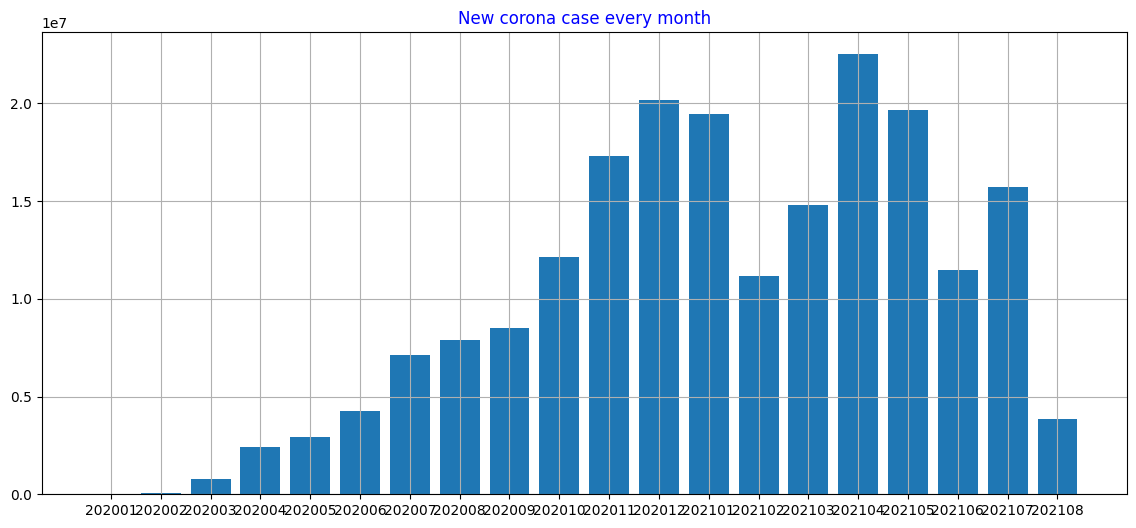

In [425]:
#plotting the output
plt.figure(figsize=(14,6))
plt.bar(data_sumCases['DateYearMonth'].to_numpy(dtype=(str)),data_sumCases['New cases'])
plt.title("New corona case every month" , color='blue')
plt.grid()
plt.show()


In [426]:
data_april= data.query('DateYearMonth== 202004')
data_april.head()

,Unnamed: 0,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,DateYearMonth
13510,13510,2020-04-01,Afghanistan,197,4,5.0,188.0,22,0,0,202004
13511,13511,2020-04-01,Albania,259,15,67.0,177.0,16,0,15,202004
13512,13512,2020-04-01,Algeria,847,58,61.0,728.0,131,14,15,202004
13513,13513,2020-04-01,Andorra,390,14,10.0,366.0,14,2,0,202004
13514,13514,2020-04-01,Angola,8,2,1.0,5.0,1,0,0,202004


In [427]:
data_country_april = data_april.groupby(data_april['Country/Region'])['New cases'].sum().reset_index()
data_country_april.head(15)

,Country/Region,New cases
0,Afghanistan,1952
1,Albania,530
2,Algeria,3290
3,Andorra,369
4,Angola,20
5,Antigua and Barbuda,17
6,Argentina,3374
7,Armenia,1534
8,Australia,2207
9,Austria,5272


In [428]:
data_april_sumCases = data_country_april.sort_values('New cases' , ascending=False)[:8]

data_april_sumCases.head(8)

,Country/Region,New cases
179,US,888804
61,France,140313
183,United Kingdom,139956
162,Spain,127546
178,Turkey,106673
142,Russia,104161
84,Italy,99671
65,Germany,91201


In [429]:
data_iran = data.loc[(data['Country/Region'] == 'Iran')]

data_iran.head(10)

,Unnamed: 0,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,DateYearMonth
80,80,2020-01-22,Iran,0,0,0.0,0.0,0,0,0,202001
273,273,2020-01-23,Iran,0,0,0.0,0.0,0,0,0,202001
466,466,2020-01-24,Iran,0,0,0.0,0.0,0,0,0,202001
659,659,2020-01-25,Iran,0,0,0.0,0.0,0,0,0,202001
852,852,2020-01-26,Iran,0,0,0.0,0.0,0,0,0,202001
1045,1045,2020-01-27,Iran,0,0,0.0,0.0,0,0,0,202001
1238,1238,2020-01-28,Iran,0,0,0.0,0.0,0,0,0,202001
1431,1431,2020-01-29,Iran,0,0,0.0,0.0,0,0,0,202001
1624,1624,2020-01-30,Iran,0,0,0.0,0.0,0,0,0,202001
1817,1817,2020-01-31,Iran,0,0,0.0,0.0,0,0,0,202001


In [430]:
# Plot the death rate in Iran on different days
data_iran['Date'] = pd.to_datetime(data_iran['Date'])
data_iran['DateMonthOfDay'] = data_iran['Date'].map(lambda data_iran :  data_iran.day)
data_iran.head()

C:\Users\khadijeh.valipour\AppData\Local\Temp\ipykernel_1012\1025698745.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_iran['Date'] = pd.to_datetime(data_iran['Date'])
C:\Users\khadijeh.valipour\AppData\Local\Temp\ipykernel_1012\1025698745.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_iran['DateMonthOfDay'] = data_iran['Date'].map(lambda data_iran :  data_iran.day)


,Unnamed: 0,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,DateYearMonth,DateMonthOfDay
80,80,2020-01-22,Iran,0,0,0.0,0.0,0,0,0,202001,22
273,273,2020-01-23,Iran,0,0,0.0,0.0,0,0,0,202001,23
466,466,2020-01-24,Iran,0,0,0.0,0.0,0,0,0,202001,24
659,659,2020-01-25,Iran,0,0,0.0,0.0,0,0,0,202001,25
852,852,2020-01-26,Iran,0,0,0.0,0.0,0,0,0,202001,26


In [431]:
iran_newDeaths_month = data_iran.groupby(['DateYearMonth'])['New deaths'].sum().reset_index()
iran_newDeaths_month


,DateYearMonth,New deaths
0,202001,0
1,202002,43
2,202003,2855
3,202004,3130
4,202005,1769
5,202006,3020
6,202007,5949
7,202008,4805
8,202009,4598
9,202010,8695


In [432]:
iran_newDeaths_day = data_iran.groupby(['DateMonthOfDay'])['New deaths'].nunique().reset_index()
iran_newDeaths_day

,DateMonthOfDay,New deaths
0,1,19
1,2,19
2,3,19
3,4,19
4,5,18
5,6,17
6,7,18
7,8,17
8,9,18
9,10,17


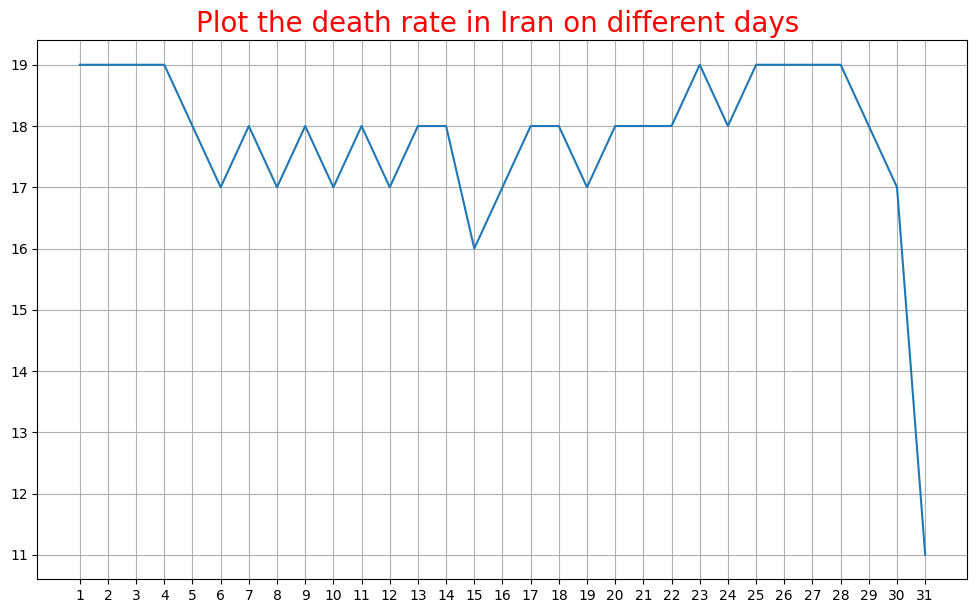

<Figure size 640x480 with 0 Axes>

In [433]:
plt.figure(figsize=(12,7))
plt.plot(iran_newDeaths_day['DateMonthOfDay'].to_numpy(dtype=(str)),iran_newDeaths_day['New deaths'])

plt.grid()
plt.title("Plot the death rate in Iran on different days " , color='red' , fontsize=20)
plt.show()
plt.savefig("plot3.png")